## <span style='color:green;'> Εξαγωγή και επιλογή δεδομένων/δυνατοτήτων </span>

**Βήματα Ανάλυσης**<br>

1. **Βιβλιοθηκες & ανακτηση δεδομενων** <br>
+ Ξεκινάμε με την εισαγωγή των απαραίτητων βιβλιοθηκών για την ανάλυση.
+ Download, αναγνωση του dataset και εκτυπωση των 5 πρωτων γραμμων



In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Feb 2025 

@author: Alexandra Mitronika
"""



import os
import kagglehub
import pandas as pd
from datetime import datetime

#Κατεβασμα dataset
path = kagglehub.dataset_download("domainnamesales/domainnamesales")
print("Path to dataset files:", path)

#Αναγνωση και δημιουργια dataframe
df = pd.read_csv(f"{path}/domain-name-sales.tsv", delimiter="\t")

df.head()

################################################################
##    Αποτελεσμα εκτυπωσης
################################################################
# 	date	domain	price	venue
# 0	1999-04-01	altavista.com	3250000	Private
# 1	1999-04-01	bingo.com	1100000	Private
# 2	1999-11-01	fly.com	1500000	Private
# 3	1999-12-01	autos.com	2200000	Private
# 4	1999-12-01	england.com	2000000	Private

In [ ]:
df.info()

################################################################
##    Αποτελεσμα εκτυπωσης
################################################################

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 348236 entries, 0 to 348235
# Data columns (total 4 columns):
#  #   Column  Non-Null Count   Dtype 
# ---  ------  --------------   ----- 
#  0   date    348236 non-null  object
#  1   domain  348236 non-null  object
#  2   price   348236 non-null  int64 
#  3   venue   348236 non-null  object
# dtypes: int64(1), object(3)
# memory usage: 10.6+ MB

In [ ]:
#Ελεγχος για μηδενικα values - εκτυπωση sum σε καθε υπαρχον χαρακτηριστικο

df.isna().sum()

################################################################
##    Αποτελεσμα εκτυπωσης
################################################################

# date      0
# domain    0
# price     0
# venue     0
# dtype: int64

2. **Προετοιμασία Dataset** <br>
+ Το dataset περιέχει περιορισμένο αριθμό στηλών από προεπιλογή. Επομένως, δημιουργω νέες στήλες για να εμπλουτίσουμε την ανάλυσή μας.
+ Επειδή τα μοντέλα μηχανικής μάθησης δεν μπορούν να επεξεργαστούν άμεσα αλφαριθμητικά δεδομένα, εξάγουμε αριθμητικές πληροφορίες από αλφαριθμητικές στήλες.
+ Εκτυπωνουμε τις 5 πρωτες γραμμες του dataframe κατοπιν δημιουργιας των νεων χαρακτηριστικων
+ Ελεγχος μηκους dataframe πριν και μετα απο αφαιρεση των dublicates για ενα ενημερωθουμε για το αν και ποσα υπηρχαν

In [ ]:
# Μετατροπη του πρωτου column σε datetime, κρατωντας μονο το ετος
df['release_year'] = pd.to_datetime(df.iloc[:, 0], errors='coerce').dt.year  # Extract only the year
 
# Υπολογισμος ηλικιας του domain
df['domain_age'] = datetime.now().year - df['release_year']

In [ ]:
# Extract the domain name (before the first dot) and domain extension (after the last dot)
df['domain_name'] = df.iloc[:, 1].apply(lambda x: x.split('.')[0] if isinstance(x, str) else None)  # Part before the first dot
df['domain_extension'] = df.iloc[:, 1].apply(lambda x: x.split('.')[-1] if isinstance(x, str) else None)  # Part after the last dot


# Προσθεση του μηκους του domain name
df['domain_name_length'] = df['domain_name'].apply(lambda x: len(x) if isinstance(x, str) else None)
 
# Προσθεση στηλης που μετραει το πληθος των non-alphabetic characters του domain name
df['non_alpha_count'] = df['domain_name'].apply(lambda x: sum(1 for char in x if not char.isalpha()) if isinstance(x, str) else None)

In [ ]:
df.head()


################################################################
##    Αποτελεσμα εκτυπωσης
################################################################

# date	domain	price	venue	release_year	domain_age	domain_name	domain_extension	domain_name_length	non_alpha_count
# 0	1999-04-01	altavista.com	3250000	Private	1999	26	altavista	com	9	0
# 1	1999-04-01	bingo.com	1100000	Private	1999	26	bingo	com	5	0
# 2	1999-11-01	fly.com	1500000	Private	1999	26	fly	com	3	0
# 3	1999-12-01	autos.com	2200000	Private	1999	26	autos	com	5	0
# 4	1999-12-01	england.com	2000000	Private	1999	26	england	com	7	0

In [ ]:
df.describe()

################################################################
##    Αποτελεσμα εκτυπωσης
################################################################


# 	price	release_year	domain_age	domain_name_length	non_alpha_count
# count	3.482360e+05	348236.000000	348236.000000	348236.000000	348236.000000
# mean	1.703811e+03	2018.856032	6.143968	9.581620	0.412769
# std	8.372487e+04	1.111501	1.111501	4.460478	1.267226
# min	3.000000e+01	1999.000000	4.000000	1.000000	0.000000
# 25%	1.550000e+02	2018.000000	5.000000	6.000000	0.000000
# 50%	2.460000e+02	2019.000000	6.000000	9.000000	0.000000
# 75%	5.100000e+02	2020.000000	7.000000	12.000000	0.000000
# max	3.000000e+07	2021.000000	26.000000	63.000000	13.000000



In [ ]:

#Ελεγχος για συνολο μη αλφαρηθμιτικων  


df['non_alpha_count'].value_counts()


################################################################
##    Αποτελεσμα εκτυπωσης
################################################################


# non_alpha_count
# 0     303464
# 1      13592
# 5      11413
# 2       5701
# 3       5345
# 6       4885
# 4       3538
# 7        244
# 8         33
# 10         8
# 9          7
# 11         3
# 12         2
# 13         1
# Name: count, dtype: int64

+ Ελεγχος μηκους dataframe πριν και μετα απο αφαιρεση των dublicates για ενα ενημερωθουμε για το αν και ποσα υπηρχαν

In [ ]:
#Ελεγχος μηκους dataframe πριν και μετα απο αφαιρεση των dublicates για ενα ενημερωθουμε για το αν και ποσα υπηρχαν


print(len(df))

# Αφαιρεση duplicate
df.drop_duplicates(subset='domain', inplace=True)


print(len(df))

####################
# 348236
# 339413

3. **Ανάλυση Outliers** <br>
+ Δημιουργια και εμφανιση boxplot
+ Το  boxplot εμφανίζει πολλά outliers που απέχουν σημαντικά από τις υπόλοιπες τιμές. Αυτά τα outliers ενδέχεται να επηρεάσουν αρνητικά την απόδοση των μοντέλων πρόβλεψης που θα χρησιμοποιήσουμε στη συνέχεια.
+ Το 95.91% των τιμών είναι κάτω από 2,500
+ Το 50% των τιμών  είναι κάτω από 231 (median)
+ Βάσει των παραπάνω, αποφασιζουμε να αφαιρεσουμε τις τιμές που ξεπερνούν τα 2,500 ως outliers.

<Axes: xlabel='price'>

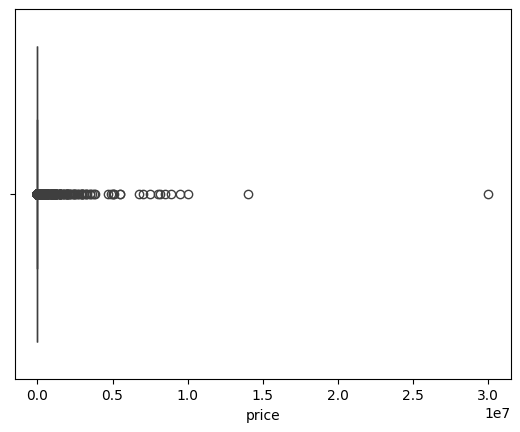

In [ ]:
import seaborn as sns 

sns.boxplot(data=df,x='price')




In [ ]:
print(f'Amount of domains with price less than 2500 {100*(len(df[df["price"] < 2500])/len(df)):.2f}%')


#Amount of domains with price less than 2500 95.91%


In [ ]:
df_filtered = df[df["price"] < 2500].copy()

df = df_filtered

print(df['price'].median())


#231.0

<Axes: xlabel='price'>

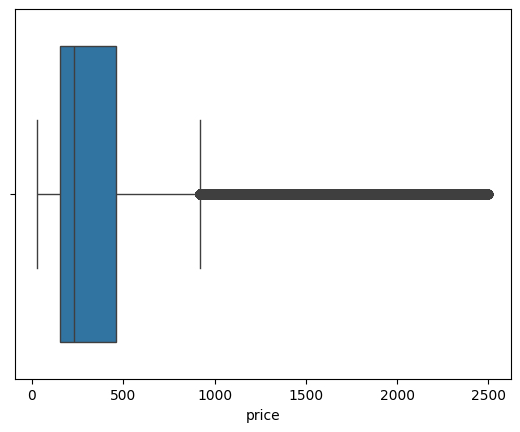

In [ ]:
import seaborn as sns 

sns.boxplot(data=df,x='price')

In [ ]:
df.describe()


# 	price	release_year	domain_age	domain_name_length	non_alpha_count
# count	325546.000000	325546.000000	325546.000000	325546.000000	325546.000000
# mean	398.510333	2018.848977	6.151023	9.653659	0.416423
# std	419.644964	1.095779	1.095779	4.465503	1.272777
# min	30.000000	2015.000000	4.000000	1.000000	0.000000
# 25%	152.000000	2018.000000	5.000000	6.000000	0.000000
# 50%	231.000000	2019.000000	6.000000	9.000000	0.000000
# 75%	459.000000	2020.000000	7.000000	12.000000	0.000000
# max	2499.000000	2021.000000	10.000000	63.000000	13.000000

In [ ]:
df.head()

# 	date	domain	price	venue	release_year	domain_age	domain_name	domain_extension	domain_name_length	non_alpha_count
# 79	2015-07-08	0112.com.cn	113	4.CN	2015	10	0112	cn	4	4
# 80	2015-07-08	15947.com	330	NameJet	2015	10	15947	com	5	5
# 81	2015-07-08	16499.com	560	NameJet	2015	10	16499	com	5	5
# 82	2015-07-08	2au.com	1060	Sedo	2015	10	2au	com	3	1
# 83	2015-07-08	382.org	900	NameJet	2015	10	382	org	3	3

+ Ελεγχουμε ποσα μοναδικα ειδη extensions υπαρχουν 
+ Προχωραμε σε encoding των extension αυτων καθως θα μας βοηθησει πολυ στην εκτιμηση  του domain price στην εφαρμογη των μοντελων που θα δουμε παρακατω και των ταξινομητων. Καποια απο αυτα ειναι πιο δημοφιλη και σχετιζονται με συγκεκριμενο ευρος τιμων. 

In [ ]:
len(df["domain_extension"].unique())


# Encoding για κατηγοριοποιηση χαρακτηριστικων οσο αφορα τα domain extensions
dummies = pd.get_dummies(df[['domain_extension', 'venue']], prefix=['extension', 'venue'])
df = pd.concat([df, dummies], axis=1)

In [ ]:
#ενδιαμεσος ελεγχος στηλων και πρωτων γραμμων των δεδομενων

print(df.columns)
 
# Εκτυπωση των πρωτων 10 rows του DataFrame
print(df.head(10))




4. **Στατιστική Ανάλυση**<br>
Αναλυση περιγραφικων στατιστικων των κυριοτερων χαρακτηριστικων, κατοπιν αφαιρεσης outliers, για βαθυτερη κατανοηση των δεδομενων.
    + Μέσος Όρος (Mean)
    + Διάμεσος (Median)
    + Μέγιστο και Ελάχιστο (Max, Min)
    + Διακύμανση (Variance) και Τυπική Απόκλιση (Standard Deviation)

In [ ]:
# Περιγραφικά στατιστικά για τα filtered χαρακτηριστικά
print(df[['price', 'release_year', 'domain_age', 'domain_name_length']].describe())



#                price   release_year     domain_age  domain_name_length
# count  325546.000000  325546.000000  325546.000000       325546.000000
# mean      398.510333    2018.848977       6.151023            9.653659
# std       419.644964       1.095779       1.095779            4.465503
# min        30.000000    2015.000000       4.000000            1.000000
# 25%       152.000000    2018.000000       5.000000            6.000000
# 50%       231.000000    2019.000000       6.000000            9.000000
# 75%       459.000000    2020.000000       7.000000           12.000000
# max      2499.000000    2021.000000      10.000000           63.000000


5. **Οπτικοποίηση Δεδομένων**
    + Ιστογραμμα - απεικονηση της συχνοτητας αναλογα με το domain name length
    + Διάγραμμα Διασποράς - συσχετιση age και price
    + Διάγραμμα Διασποράς - συσχετιση domain name length και price
    + Ιστογραμμα - απεικονηση κατανομησ της τιμης
    + Διαγραμμα μπαρας - domains που εχουν καταγραφει μεχρι τα σημερινα χρονια
    + Διαγραμμα μπαρας - βλεπουμε ποια extensions εχουν μεγαλυτερη βαρυτητα

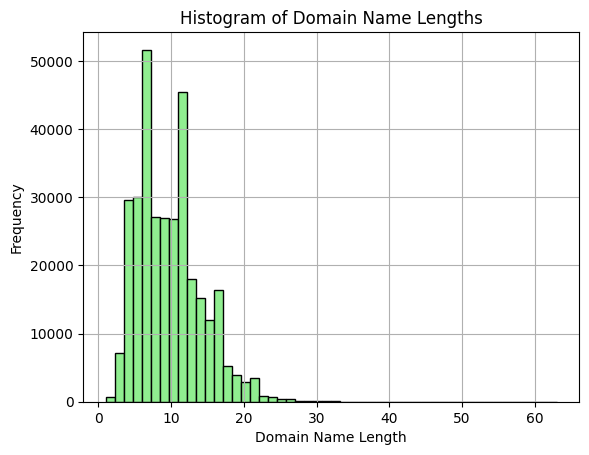

In [ ]:
import matplotlib.pyplot as plt

# Ιστογραμμα για το μήκος του domain name και τη συχνοτητα που παρουσιαζεται

df['domain_name_length'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Domain Name Lengths')
plt.xlabel('Domain Name Length')
plt.ylabel('Frequency')
plt.show()


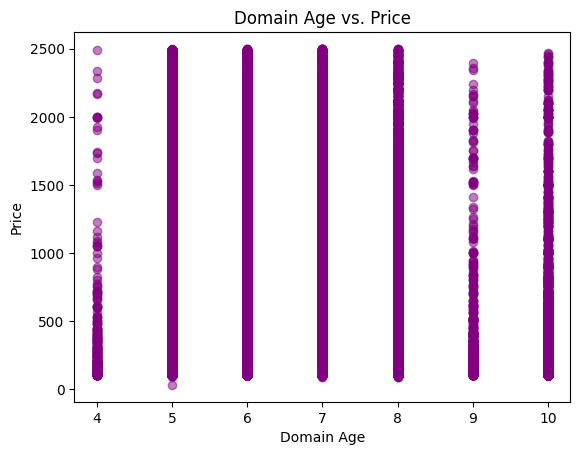

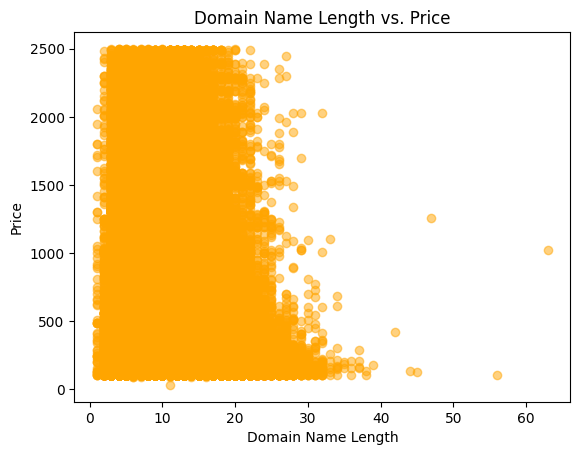

In [ ]:
# Scatter plot για Domain Age και Price
plt.scatter(df['domain_age'], df['price'], alpha=0.5, color='purple')
plt.title('Domain Age vs. Price')
plt.xlabel('Domain Age')
plt.ylabel('Price')
plt.show()

# Scatter plot για Domain Name Length και Price
plt.scatter(df['domain_name_length'], df['price'], alpha=0.5, color='orange')
plt.title('Domain Name Length vs. Price')
plt.xlabel('Domain Name Length')
plt.ylabel('Price')
plt.show()


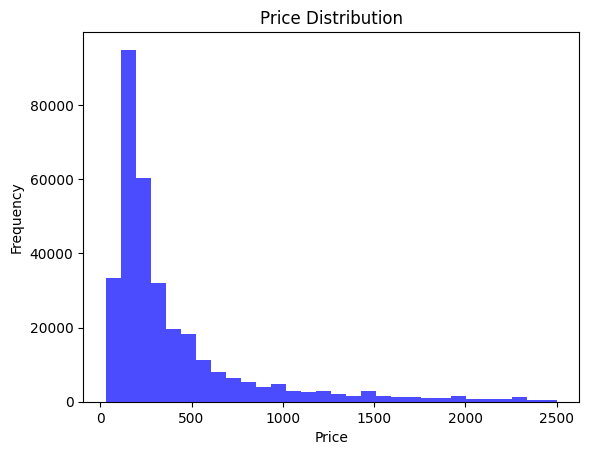

In [ ]:
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


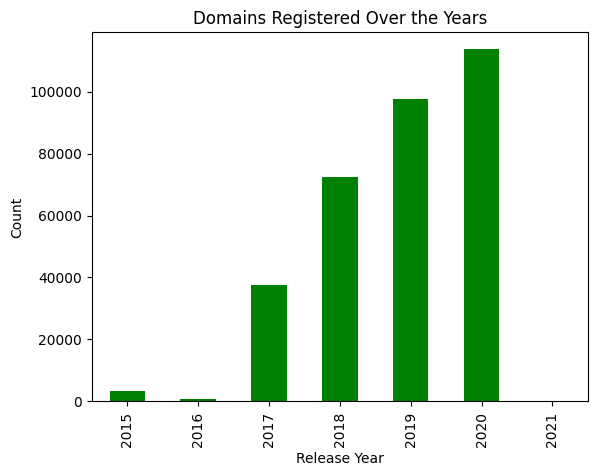

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Domains Registered Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


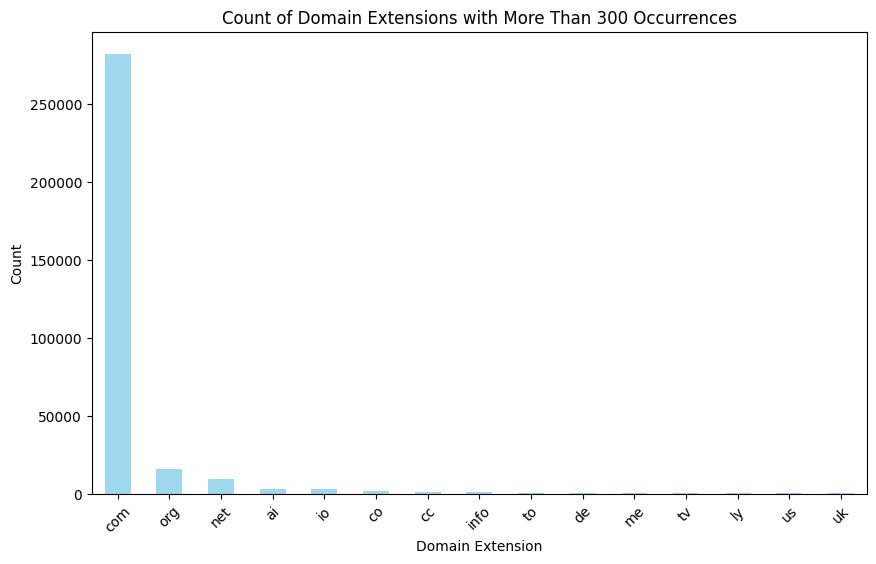

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each domain extension
extension_counts = df['domain_extension'].value_counts()

# Filter to include only extensions with more than 300 occurrences
filtered_extension_counts = extension_counts[extension_counts > 300]

# Plot the bar chart
plt.figure(figsize=(10, 6))
filtered_extension_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Count of Domain Extensions with More Than 300 Occurrences')
plt.xlabel('Domain Extension')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## <span style='color:green;'> Στατιστικα Συμπερασματα </span>

1. **Πριν την Αφαίρεση Outliers**<br>

+ Το mean και το standard deviation δείχνουν μεγάλη διακύμανση.
+ Το 95.91% των domain έχουν τιμή κάτω από 2,500, δείχνοντας υψηλή πυκνότητα σε αυτό το εύρος.
+ Τα outliers είναι εμφανή, καθώς οι μέγιστες τιμές απέχουν σημαντικά από το mean.

2. **Μετά την Αφαίρεση Outliers**<br>

+ Το mean και το standard deviation έχουν μειωθεί, δείχνοντας πιο ομοιογενή δεδομένα
+ Από τα plots:
    + Τα περισσότερα domain lengths βρίσκονται στο εύρος 5-15 χαρακτήρων
    + Δεν υπάρχει εμφανής συσχέτιση μεταξύ domain name και τιμής
    + Η κατανομή των τιμών δείχνει ότι οι περισσότερες βρίσκονται κοντά στα 200, ενώ ακραίες τιμές είναι σπάνιες.
    + o	Με την πάροδο των χρόνων, ο αριθμός των κατοχυρωμένων domain αυξάνεται σημαντικά
    + o	Οι πιο δημοφιλείς επεκτάσεις είναι τα .com και .org, με το .com να είναι το πιο διαδεδομένο.


## <span style='color:green;'> Scaling </span>

Γνωρίζοντας ότι θα χρησιμοποιηθούν μοντέλα μηχανικής μάθησης, εφαρμόζουμε scaling στις τιμές μεσα στους αλγοριθμους παρακατω. Αυτό βοηθάει στη βελτιστοποίηση της απόδοσης των μοντέλων, καθώς λειτουργούν καλύτερα με κανονικοποιημένα δεδομένα.

## <span style='color:green;'> Μοντελοποιηση Δεδομενων </span>

1. **Γραμμική Παλινδρόμηση (Linear Regression)**

    1.  <span style='color:darkred;font-size:18px'> Σχολια για γραμμικη παλινδρομηση </span>

        + Το MSE [mean squared error] δειχνει τη διαφορα των προβλεψεων σε σχεση με τις πραγματικες τιμες. Στην συγκεκριμενη περιπτωση το MSE ειναι μεγαλο, δηλαδη οι προβλεψεις μας απεχουν αρκετα απο τις πραγματικες 
        + To R-squared εξηγει ποσο καλα το μοντελο καλυπτει τη διαφορετικοτητα της εξαρτημενης μεταβλητης. Στη συγκεκριμενη περιπτωση εχει τιμη 0.27, αρκετα πιο χαμηλα απο το 1.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import math



# Drop μη χρειαζουμενα columns
df = df.drop([ "domain","domain_name","domain_extension",'date',"venue" ], axis=1)

# Επιλογη χαρακτηριστικων (X) και στοχου (y)
X = df.drop('price', axis=1)  # Drop του 'price'
y = df['price']  # target χαρακτιριστικου

# Split τα δεδομενα σε training και testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  (Standardization) - Τυποποιηση
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize the training set
X_test = scaler.transform(X_test)  # Standardize the testing set

# Linear Regression Model
lr_model = LinearRegression()  # Create a linear regression model
lr_model.fit(X_train, y_train)  # Train the model
y_pred = lr_model.predict(X_test)  # Make predictions

# Αξιολογηση μοντελου
mse = mean_squared_error(y_test, y_pred)  # Υπολογισμος Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Υπολογισμος R-squared value

print(f"Mean Squared Error of Linear Regression: {mse:.2f}")  # Print MSE
print(f"R-squared of Linear Regression: {r2:.2f}")  # Print R-squared
print(f"RMSE of Linear Regression: {(math.sqrt(mse)):.2f}")  # Print RMSE



################################################################################################
################################################################################################
#Αποτελεσματα
# Mean Squared Error of Linear Regression: 127842.52
# R-squared of Linear Regression: 0.27
# RMSE of Linear Regression: 357.55

In [ ]:
#Απλοσ διαδικαστικος ελεγχος μεταξυ μοντελων

df.columns

# Index(['price', 'release_year', 'domain_age', 'domain_name_length',
#        'non_alpha_count', 'extension_ac', 'extension_academy',
#        'extension_accountant', 'extension_africa', 'extension_ag',
#        ...
#        'venue_Undeveloped', 'venue_Uniregistry', 'venue_UserScape.com',
#        'venue_VFDomains.com', 'venue_West.cn', 'venue_Whois.ai',
#        'venue_XYNames.com', 'venue_aset.com', 'venue_hypernames.co',
#        'venue_prycr.com'],
#       dtype='object', length=441)

2. **Random Forest Regressor και XGBoost Regressor**


    1.  <span style='color:darkred;font-size:18px'> Σχολια για Random Forest Regressor </span>

        + Το MSE [mean squared error] δεν ειναι πολυ χαμηλο, που σημαινει οτι εχουμε μειωμενο accuracy
        + To MAE (Mean Absolute Error) μας δειχνει το average λαθος στην τιμη [231.25], κατι το οποιο στην περιπτωση μας ισως ειναι λογικο απο τη στιγμη που οι τιμες βρισκονται σε ενα καπως μεγαλο ευρος, ωστοσο οχι ικανοποιητικο.
        + R-squared χαμηλο, το οποιο δεν ειναι καλο, αναγνωριζει μικρο ποσοστο του variance
        + RMSE (Root Mean Squared Error), ειναι ενας δεικτης που χειριζεται καλυτερα outliers ή πιο υψηλες τιμες. Στη δικη μας περιπτωση ειναι οκ για τιμες σε ενδιαμεσο ευρος τιμων.


    2. <span style='color:darkred;font-size:18px'> Σχολια για XGBoost Regressor </span>
    + Το MSE [mean squared error] λιγο χαμηλοτερο απο το προηγουμενο αλγοριθμος μας, που σημαινει οτι διαχειριζεται καλυτερα τα λαθη.
    + To MAE (Mean Absolute Error) παρομοιο με του Random Forest Regressor
    + R-squared πανομοιοτυπο με του Random Forest Regressor
    + RMSE (Root Mean Squared Error) ελαχιστα χαμηλοτερο ποθυπονοει καλυτερη διαχειριση σε outliers

    3. **Σχολιασμος διαφορετικοτητας και λυσεις**<br> 
    + Το δευτερο μοντελο μας θελει γενικα προσοχη στη ρυθμιση παραμετρων. Πιθανη λυση θα μπορουσε να ειναι η αυξηση των n_estimators [ Για παραδειγμα n_estimators=500]
    + Στο Random Forest μοντελο θελει προσοχη στην υπερπροσαρμογη. Ωστοσο, επειδη αυτο ισως συμβει κυριως σε μικροτερα dataset πολυ πιθανον να μην ισχυει στη δικη μας βαση δεδομενων.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error




rf_model = RandomForestRegressor(
    n_estimators=200,  # Αριθμος δενδρων
    max_depth=20,      # Βαθος δενδρων
    min_samples_split=5,  # Minimum δειγματα για split
)

rf_model.fit(X_train, y_train)
rf_pred = (rf_model.predict(X_test)) 

# Αξιολογηση Random Forest
rf_mse = mean_squared_error((y_test), rf_pred)
rf_mae = mean_absolute_error((y_test), rf_pred)
rf_r2 = r2_score((y_test), rf_pred)

print("Random Forest Evaluation:")
print(f"MSE: {rf_mse:.2f}, MAE: {rf_mae:.2f}, R^2: {rf_r2:.2f}")
print(f"RMSE: {(math.sqrt(rf_mse)):.2f}")  # Print RMSE

# XGBoost with Fixed Hyperparameters
#Εδω ορισαμε συγκεκριμενες παραμετρους για το μοντελο μας, για βελτιστοποιηση ισορροπιας ταχυτητας και υπολογιστικοτητας
xgb_model = XGBRegressor(
    learning_rate=0.1,  # Learning rate (step size)
    max_depth=6,        # Βαθος δενδρων
    n_estimators=200,   # Αριθμοςδενδρων
)
xgb_model.fit(X_train, y_train)
xgb_pred = (xgb_model.predict(X_test))  

# Evaluatιον
xgb_mse = mean_squared_error((y_test), xgb_pred)
xgb_mae = mean_absolute_error((y_test), xgb_pred)
xgb_r2 = r2_score((y_test), xgb_pred)

print("XGBoost Evaluation:")
print(f"MSE: {xgb_mse:.2f}, MAE: {xgb_mae:.2f}, R^2: {xgb_r2:.2f}")
print(f"RMSE: {(math.sqrt(xgb_mse)):.2f}")  # Print RMSE



########################################################################
# Random Forest Evaluation:
# MSE: 124769.57, MAE: 231.27, R^2: 0.29
# RMSE: 353.23
# XGBoost Evaluation:
# MSE: 124160.73, MAE: 231.40, R^2: 0.29
# RMSE: 352.36

## <span style='color:green;'> Ταξινομηση Δεδομενων </span>

1. **Support Vector Machine (SVM)**



    1.  <span style='color:darkred;font-size:18px'> Σχολια για Support Vector Machine </span>

        + Εχουμε πολυ μεγαλο Accuracy στην συγκεκριμενη περιπτωση σε ολες τις κλασεις που εχουμεμ ορισει το οποιο σημαινει οτι το μοντελο μας ειναι πολυ αποτελεσματικο. 
        + Βλεπουμε οτι ακομα και το F1-score υψηλο αποτελεσμα, αρα βλεπουμε μια ισορροπια


In [ ]:
#=--------------------------Support Vector Machine (SVM)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Κατηγοριοποιηση των (Low, Medium, High) σε τεταρτημορια
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])



# Επιλογη χαρακτηριστικων (X) και στοχου(y)
X = df.drop('price_category', axis=1)  # Drop the target variable 'price_category'
y = df['price_category']  # Target variable 

# Κωδικοποίηση ετικετών
le = LabelEncoder()
y = le.fit_transform(y)  # Μετατροπή κατηγοριών σε αριθμούς


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Τυποποίηση χαρακτηριστικών
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

# (SVM)
svm_model = SVC(kernel='linear')  # Δημιουργία μοντέλου SVM 
svm_model.fit(X_train, y_train)  # Εκπαίδευση του μοντέλου
svm_pred = svm_model.predict(X_test)  # Πρόβλεψη με το μοντέλο 


print("Ακρίβεια SVM:", accuracy_score(y_test, svm_pred))  # Εκτύπωση ακρίβειας 
print("\nΑναφορά Ταξινόμησης SVM:\n", classification_report(y_test, svm_pred))  # Εκτύπωση αναφοράς 


################################################################################################
################################################################################################
#Αποτελεσματα

# Ακρίβεια SVM: 0.9965443096298572

# Αναφορά Ταξινόμησης SVM:
#                precision    recall  f1-score   support

#            0       1.00      1.00      1.00     21649
#            1       0.99      1.00      1.00     21846
#            2       1.00      0.99      0.99     21615

#     accuracy                           1.00     65110
#    macro avg       1.00      1.00      1.00     65110
# weighted avg       1.00      1.00      1.00     65110





2. **KNN**


    1.  <span style='color:darkred;font-size:18px'> Σχολια για KNN </span>

        + Βλεπουμε ενα αρκετα μεγαλο ποσοστο ακριβειας, που ωστοσο θα μπορουσε να βελτιστοποιηθει λιγο παραπανω
        + Μικρες διαφορες μεταξυ κλασεων και μειονοτητων


In [ ]:
#--------------KNN-------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



# Κατηγοριοποιηση των (Low, Medium, High) σε τεταρτημορια
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])


# Επιλογη χαρακτηριστικων (X) και στοχου(y)
X = df.drop('price_category', axis=1)  # Drop the target variable 'price_category'
y = df['price_category']  # Target variable

# Encoding για κατηγοριες
le = LabelEncoder()
y = le.fit_transform(y)  # Μετατροπη κατηγοριων σε αριθμους

# Διαχωρισμος training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Standardization) - Typopoihsh
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize the training set
X_test = scaler.transform(X_test)  # Standardize the testing set

# k-NN Model
knn_model = KNeighborsClassifier(n_neighbors=579)  # Δημιουργια k-NN model with 579 neighbors [ απο ριζα του συνολου]
knn_model.fit(X_train, y_train)  # Train the model
knn_pred = knn_model.predict(X_test)  

# Model Evaluation
print("Accuracy of k-NN:", accuracy_score(y_test, knn_pred))  #  accuracy
print("\nClassification Report of k-NN:\n", classification_report(y_test, knn_pred))  #  classification report



################################################################################################
################################################################################################
#Αποτελεσματα

# Accuracy of k-NN: 0.8643833512517278

# Classification Report of k-NN:
#                precision    recall  f1-score   support

#            0       0.97      0.86      0.91     21649
#            1       0.80      0.95      0.87     21846
#            2       0.84      0.79      0.81     21615

#     accuracy                           0.86     65110
#    macro avg       0.87      0.86      0.86     65110
# weighted avg       0.87      0.86      0.86     65110

3. **Ναϊβ Βάιες (Naive Bayes)**


    1.  <span style='color:darkred;font-size:18px'> Σχολια για Ναϊβ Βάιες (Naive Bayes) </span>

        + To accuracy ειναι μετριο και κανει perform πολυ καλα σε 2 απο τις 3 κλασεις
        + Επισης το recall το οποιο δειχνει τα οντως θετικα, ειναι υψηλο για 2 απο τις κλασεις και παρα πολυ χαμηλο για μια απο αυτες
        + Υπαρχει ανισορροπια μεταξυ των κλασεων


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Κατηγοριοποιηση των (Low, Medium, High) σε τεταρτημορια
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High']) 

# Ορισμος χαρακτηριστων (X) και στοχου (y)
X = df.drop('price_category', axis=1)  # Drop  'price_category'
y = df['price_category']  # Ορισμος y

# labeling
le = LabelEncoder()
y = le.fit_transform(y)  # Μετατροπή κατηγοριών σε αριθμούς

#  Διαχωρισμός δεδομένων σε σύνολα εκπαίδευσης και δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Τυποποίηση του συνόλου εκπαίδευσης
X_test = scaler.transform(X_test)  # Τυποποίηση του συνόλου δοκιμής

# (Naive Bayes)
nb_model = GaussianNB()  # Δημιουργία μοντέλου 
nb_model.fit(X_train, y_train)  # Εκπαίδευση  μοντέλου
nb_pred = nb_model.predict(X_test)  # Πρόβλεψη  

# Απόδοση
print("Ακρίβεια Naive Bayes:", accuracy_score(y_test, nb_pred))  # Accuracy
print("\nΑναφορά Ταξινόμησης Naive Bayes:\n", classification_report(y_test, nb_pred))  # Report







#############################################################

# Ακρίβεια Naive Bayes: 0.6445707264629089

# Αναφορά Ταξινόμησης Naive Bayes:
#                precision    recall  f1-score   support

#            0       0.96      0.10      0.19     21649
#            1       0.95      0.87      0.91     21846
#            2       0.48      0.96      0.64     21615

#     accuracy                           0.64     65110
#    macro avg       0.80      0.64      0.58     65110
# weighted avg       0.80      0.64      0.58     65110

## <span style='color:green;'> Συμπερασματα </span>

Συναπτικα, ο ταξινομητης SVM εχει την καλυτερη αποδοση με την καλυτερη διαχωρηση μεταξυ δεδομενων.
Οσο αναφορα την παλινδρομηση, οι Random Forest and XGBoost εδειξαν καλυτερη αποδοση σε σχεση με τοn Linear regression.

Σε μετεπειτα βηματα θα μπορουσαμε: 

+ Να εξερευνησουμε την αναπτυξη λεπτομερων χαρακτηριστικων σε βαθος γραμμικοτητας και συσχετισης
+ Να χρησιμοποιησουμε tuning και στον random Forest Regressor
+ Να εστιασουμε στη διαστατικοτητα, δηλαδη να μειωσουμε παραγοντες σχετιζομενους με τισ διαστασεις για να βελτιωσουμε τους k-NN kai Naive Bayes.

